In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#attributes don't use () only methods
df = pd.read_csv("Contact Information (Responses) - Form Responses 1.csv")
df.head()
df.shape

(14, 18)

In [5]:
#used to set display attributes of data frame
pd.set_option('display.max_columns',18)



In [6]:
#head or tail to view rows and can input integer in parenthesis
df.head()


,Timestamp,Sleep,Wake,Sleep Quality,Waking Energy,Work,Focused Learning,Skill practicing,Physical Endeavors,Scrolling,jorking,Passive media,Active Media,Dominant Emotion with intensity (1-10),Dominant Emotion with intensity (1-10).1,Enhancers,how much?,MISC
0,6/30/2025 23:48:42,2:00:00 AM,11:00:00 AM,6,NaN,0,120 minutes,60 minutes,0 minutes,33 minutes,10 miinutes,60 minutes,180 minutes,Flat/Numb,3,NIC,1 pouch,"Pain in left knee from run on sunday biggest ""..."
1,7/1/2025,12:00:00 AM,6:00:00 AM,4,10.0,8 hours transplanting roses in sun,0,10 minutes,90 minutes,30 minutes,2,53 minutes,15 minutes,Motivated,4,CAF,100 g,Work up goal oriented when I got sleepy took s...
2,7/2/2025,12:00:00 AM,6:00:00 AM,6,8.0,8 hours pulling rose bushes,0 minutes,0 minutes,100 minutes,40 minutes,2,90 minutes,75 minutes,Calm,4,WE,100,Had a slight discussion with superviser but i ...
3,7/3/2025,5:00:00 AM,7:45:00 AM,2,4.0,no work,60 minutes,0 minutes,0 minutes,0 minutes,2,90 minutes,180 minutes,Flat/Numb,5,NaN,NaN,Had to catch a flight lost track of time reaso...
4,7/4/2025 0:09:13,3:00:00 AM,11:30:00 AM,3,4.0,0 monites,30 minutes,0 minutes,30 minutes,30 minutes,1,40 minutes,260 minutes,Calm,4,NaN,NaN,Had a headache


In [7]:
energy = df['Waking Energy']
type(energy)
df.columns
# a dataframe is a container for a group of series which are just arrays

Index(['Timestamp', 'Sleep', 'Wake', 'Sleep Quality', 'Waking Energy', 'Work',
       'Focused Learning', 'Skill practicing', 'Physical Endeavors',
       'Scrolling', 'jorking', 'Passive media ', 'Active Media',
       'Dominant Emotion with intensity (1-10)',
       'Dominant Emotion with intensity (1-10).1', 'Enhancers', 'how much?',
       'MISC'],
      dtype='object')

In [8]:
#iloc integer location 
df.iloc[0]
#loc index location
df.loc[2]


Timestamp                                                                            7/2/2025
Sleep                                                                             12:00:00 AM
Wake                                                                               6:00:00 AM
Sleep Quality                                                                               6
Waking Energy                                                                             8.0
Work                                                              8 hours pulling rose bushes
Focused Learning                                                                    0 minutes
Skill practicing                                                                    0 minutes
Physical Endeavors                                                                100 minutes
Scrolling                                                                          40 minutes
jorking                                                     

In [9]:
df["jorking"].value_counts()
df.loc[2:8,'jorking']


2    2
3    2
4    1
5    3
6    1
7    1
8    2
Name: jorking, dtype: object

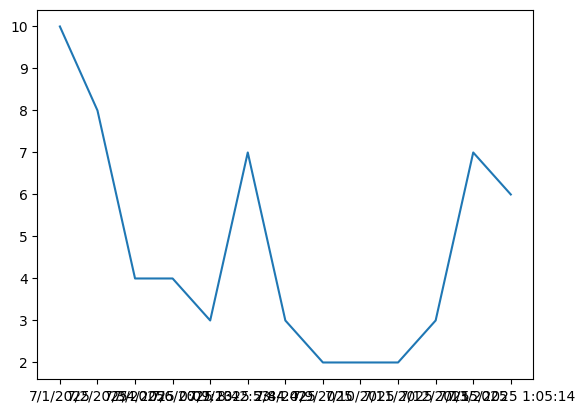

In [15]:
x = df.Timestamp
y = df['Waking Energy']
z = df['Wake']
plt.plot(x,y)